# Installing all required libraries

In [3]:
import heapq
import time
import matplotlib.pyplot as plt
import tkinter
import numpy
import plotly

# Proof of Forward Check  Algorithm Solving the Scenarios

In [4]:
# checking whether assignment is valid
def check_valid_assignment(assignment, constraints):
    for constraint in constraints:
        if not constraint(assignment):
            return False
    return True
# forward checking function
def forward_check(assignment, variables, domains, constraints):
    for variable in variables:
        if variable not in assignment:
            for value in list(domains[variable]):
                assignment[variable] = value
                if not check_valid_assignment(assignment, constraints):
                    domains[variable].remove(value)
            assignment[variable] = None
# forward checking search function
def forward_check_search(assignment, variables, domains, constraints):
    if len(assignment) == len(variables):
        return assignment

    variable = [var for var in variables if var not in assignment]

    # check if all variables are assigned
    if not variable:
        return assignment

    variable = variable[0]

    for value in domains[variable]:
        assignment[variable] = value

        forward_check(assignment, variables, domains, constraints)

        if check_valid_assignment(assignment, constraints):
            result = forward_check_search(assignment, variables, domains, constraints)

            if result is not None:
                return result

        assignment[variable] = None

    return None

# CSP scenarios
scenario_1_vars = ['Juan', 'Jane', 'Jim']
scenario_2_vars = ['Anita', 'Peter','Jim', 'Jane']

scenario_1_domains = {
    'Juan': ['Web Designer', 'AI Engineer'],
    'Jim': ['AI Engineer', 'Systems Engineer'],
    'Jane': ['Python Programmer', 'Database Admin']
}

scenario_2_domains = {
    'Jim': ['AI Engineer', 'Systems Engineer'],
    'Jane': ['Python Programmer', 'Database Admin'],
    'Anita': ['Web Designer', 'AI Engineer'],
    'Peter': ['Python Programmer', 'AI Engineer']
}

# assigning Ciara as the first Python Programmer
first_assignment_scenario_1 = {'Ciara': 'Python Programmer'}

# defining the constraint that each person can have at most two roles
def validate_roles_limit(assignment):
    # handling uninitialized roles
    role_count = {role: 0 for role in ['Python Programmer', 'AI Engineer', 'Web Designer', 'Database Admin', 'Systems Engineer']}

    for roles in assignment.values():
        for role in roles:
            # checking if the role is in the role_count dictionary
            if role in role_count:
                role_count[role] += 1
                if role_count[role] > 2:
                    return False
            else:
                return False
    return True

constraints = [validate_roles_limit]

# determining who to hire in  Scenario 1
scenario_1_sol = forward_check_search(first_assignment_scenario_1, scenario_1_vars, scenario_1_domains, constraints.copy())

# determining who to hire in  Scenario 2
scenario_2_sol = forward_check_search({}, scenario_2_vars, scenario_2_domains, constraints.copy())

print("Ciara's Company should hire:\n", scenario_1_vars)
print("\nCiara & Juan Partnership should hire:\n", scenario_2_vars)

Ciara's Company should hire:
 ['Juan', 'Jane', 'Jim']

Ciara & Juan Partnership should hire:
 ['Anita', 'Peter', 'Jim', 'Jane']


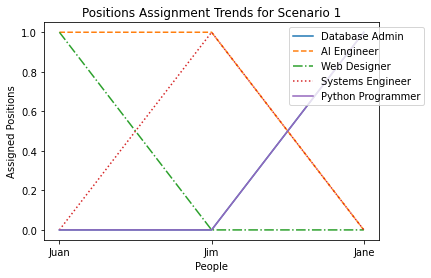

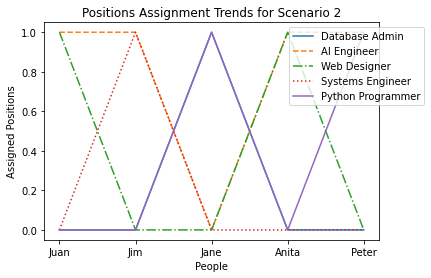

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# function to plot solution using line charts
def plot_solution_line(solution, scenario_name):
    roles = list(set(role for roles in solution.values() for role in roles))
    people = list(solution.keys())

    line_styles = ['-', '--', '-.', ':']
    index = np.arange(len(people))

    for i, role in enumerate(roles):
        counts = [1 if role in solution[person] else 0 for person in people]
        plt.plot(index, counts, label=role, linestyle=line_styles[i % len(line_styles)])

    plt.xlabel('People')
    plt.ylabel('Assigned Positions')
    plt.title(f'Positions Assignment Trends for {scenario_name}')
    plt.xticks(index, people)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

# line Chart for Scenario 1
plot_solution_line(scenario_1_solution, 'Scenario 1')

# line Chart for Scenario 2
plot_solution_line(scenario_2_solution, 'Scenario 2')

# (ii). Alternate Scenarios - Interactive Visualisations

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# function to create an interactive network diagram
def create_interactive_visualization(solution, scenario_name):
    # extracting unique duties and people
    roles = list(set(role for roles in solution.values() for role in roles))
    people = list(solution.keys())

    # create a subplot with network diagram
    fig = make_subplots(rows=1, cols=1)

    # adding nodes for the people
    for person in people:
        fig.add_trace(go.Scatter(x=[person]*len(roles), y=roles, mode='markers+text', marker=dict(size=10), text=person, name=person))

    # adding edges for duty assignments
    for role in roles:
        role_people = [person for person in people if role in solution[person]]
        for i in range(len(role_people) - 1):
            for j in range(i + 1, len(role_people)):
                fig.add_trace(go.Scatter(x=[role_people[i], role_people[j]], y=[role, role],
                                         mode='lines', line=dict(color='blue'), showlegend=False))

    # layout settings
    fig.update_layout(title=f'Interactive Visualization - {scenario_name}',
                      xaxis=dict(title='People'),
                      yaxis=dict(title='Poitions'),
                      showlegend=True)

    # display the interactive plot
    fig.show()

# solution for scenario 1
scenario_1_solution = {
    'Juan': ['Web Designer', 'AI Engineer'],
    'Jim': ['AI Engineer', 'Systems Engineer'],
    'Jane': ['Python Programmer', 'Database Admin']
}

# solution for scenario 2
scenario_2_solution = {
    'Juan': ['Web Designer', 'AI Engineer'],
    'Jim': ['AI Engineer', 'Systems Engineer'],
    'Jane': ['Python Programmer', 'Database Admin'],
    'Anita': ['Web Designer', 'AI Engineer'],
    'Peter': ['Python Programmer', 'AI Engineer']
}

# the interactive visualizations
create_interactive_visualization(scenario_1_solution, 'Scenario 1')
create_interactive_visualization(scenario_2_solution, 'Scenario 2')

# (iii). Alternate Scenarios - GUI Visualization

In [7]:
import tkinter as tk
from tkinter import ttk

# function to determine all possible position combinations for each person
def determine_all_roles(scenario_vars, scenario_domains):
    all_roles = {}
    for person in scenario_vars:
        available_roles = scenario_domains[person]
        all_roles[person] = ', '.join(available_roles) if available_roles else 'No roles assigned'
    return all_roles

# function to handle GUI interactions and display all positions
def display_all_roles(scenario_vars, scenario_domains, scenario_name):
    # determine all possible position combinations for each person
    all_roles = determine_all_roles(scenario_vars, scenario_domains)

    # display the result in the Listbox
    result_listbox.delete(0, tk.END)
    for person, roles in all_roles.items():
        color = "green" if roles else "red"  # green for assigned positions, red for unassigned positions
        result_listbox.insert(tk.END, f"{person}: {roles}")
        result_listbox.itemconfig(tk.END, {'fg': color})

# creating the GUI window
root = tk.Tk()
root.title("AI Hiring Scenarios")

# scenario 1 Button
scenario_1_button = ttk.Button(root, text="Scenario 1", command=lambda: display_all_roles(
    ['Juan', 'Jane', 'Jim'],
    {
        'Juan': ['Web Designer', 'AI Engineer'],
        'Jim': ['AI Engineer', 'Systems Engineer'],
        'Jane': ['Python Programmer', 'Database Admin']
    },
    "Scenario 1"
))
scenario_1_button.pack(pady=10)

# scenario 2 Button
scenario_2_button = ttk.Button(root, text="Scenario 2", command=lambda: display_all_roles(
    ['Anita', 'Peter', 'Jim', 'Jane'],
    {
        'Jim': ['AI Engineer', 'Systems Engineer'],
        'Jane': ['Python Programmer', 'Database Admin'],
        'Anita': ['Web Designer', 'AI Engineer'],
        'Peter': ['Python Programmer', 'AI Engineer']
    },
    "Scenario 2"
))
scenario_2_button.pack(pady=10)

# listbox to display the result
result_listbox = tk.Listbox(root, font=("Helvetica", 12, "bold"))
result_listbox.pack(pady=10,padx=10, fill=tk.BOTH, expand=True)

# running the GUI
root.mainloop()